Nome: WELSON DE AVELAR SOARES FILHO

# Lista 10
Seja o seguinte problema de valor de contorno:
\begin{equation}
u''(x) - 4u(x) = 4x,\hspace{1cm} 0 \leqslant x \leqslant 1 \\
\end{equation}
sujeito às seguintes condições de contorno
\begin{equation*}
u(0) = u(1) = 0,
\end{equation*}
cuja solução exata é
\begin{equation*}
u(x) = \frac{e^{2x} - e^{-2x}}{e^2 - e^{-2}} - x.
\end{equation*}

### 1) Resolva o problema usando o método dos momentos com $N=3$. 

(a) Apresente as funções bases da solução aproximada e as funções de ponderação.

funções de base da solução:

$ϕ_j = x^j(1-x)$

$\phi_1 = x-x^2$

$\phi_2 = x^2 - x^3$

$\phi_3 = x^3 - x^4$

$ũ(x) = \alpha_1\phi_1 +\alpha_2\phi_2+\alpha_3\phi_3$

___

funções de ponderação:

$ω_i = x^{i-1}$

$\omega_1 = 1$

$\omega_2 = x$

$\omega_3 = x^2$

(b) Apresente a matriz $\mathbf{A}$ e o vetor $\mathbf{b}$ do sistema linear resultante.

$L[\phi_1] = -2 - 4x + 4x^2$

$L[\phi_2] = 2 - 6x - 4x^2 + 4x^3$

$L[\phi_3] = \frac{d^2}{dx^2}(x^3-x^4)-4(x^3-x^4) = 6x - 12x^2 - 4x^3 + 4x^4 $

___

Os termos $A_{ij}$ ficam:

$A_{11} = -\frac{8}{3} $

$A_{12} = -\frac{4}{3} $

$A_{21} = -\frac{4}{3} $

$A_{22} = -\frac{6}{5} $

$A_{13} = \int_0^1 1(6x - 12x^2 - 4x^3 + 4x^4)dx$

$A_{23} = \int_0^1 x(6x - 12x^2 - 4x^3 + 4x^4)dx$

$A_{31} = \int_0^1 x^2(-2 - 4x + 4x^2)dx$

$A_{32} = \int_0^1 x^2(2 - 6x - 4x^2 + 4x^3)dx$

$A_{33} = \int_0^1 x^2(6x - 12x^2 - 4x^3 + 4x^4)dx$

___

Os termos $b_i$ são:

$b_1 = 2$

$b_2 = \frac{4}{3}$

$b_3 = \int_0^1 x^2(4x)dx$


In [32]:
import numpy as np, sympy as sp, matplotlib.pyplot as plt

In [33]:
def A13(x):
  return 6*x - 12*x**2 - 4*x**3 + 4*x**4
def A23(x):
  return x*(6*x - 12*x**2 - 4*x**3 + 4*x**4)
def A31(x):
  return (x**2)*(-2 - 4*x + 4*x**2)
def A32(x):
  return (x**2)*(2 - 6*x - 4*x**2 + 4*x**3)
def A33(x):
  return (x**2)*(6*x - 12*x**2 - 4*x**3 + 4*x**4)
def B3(x):
  return (x**2)*4*x

######################################

x = sp.Symbol("x")
A1 = np.zeros([3,3])
A1[0,0] = -8/3
A1[0,1] = -4/3
A1[0,2] = sp.integrate(A13(x), (x, 0, 1))
A1[1,0] = -4/3
A1[1,1] = -6/5
A1[1,2] = sp.integrate(A23(x), (x, 0, 1))
A1[2,0] = sp.integrate(A31(x), (x, 0, 1))
A1[2,1] = sp.integrate(A32(x), (x, 0, 1))
A1[2,2] = sp.integrate(A33(x), (x, 0, 1))

print("Matriz A")
print(A1)

B1 = np.zeros(3)
B1[0] = 2
B1[1] = 4/3
B1[2] = sp.integrate(B3(x), (x, 0, 1))

print("Matriz B")
print(B1)

a1 = np.linalg.solve(A1, B1)
print("Coeficientes alfa")
print(a1)

Matriz A
[[-2.66666667 -1.33333333 -1.2       ]
 [-1.33333333 -1.2        -1.13333333]
 [-0.86666667 -0.96666667 -0.9952381 ]]
Matriz B
[2.         1.33333333 1.        ]
Coeficientes alfa
[-0.4490894  -0.39321192 -0.23178808]


(c) Plote o gráfico da solução aproximada em comparação ao gráfico da solução exata.

In [34]:
def sol_exata(a):
  return (np.exp(2*a) - np.exp(-2*a)) / (np.exp(2) - np.exp(-2)) - a

In [35]:
def phi1(a):
  return a - a**2
def phi2(a):
  return a**2 - a**3
def phi3(a):
  return a**3 - a**4

######################################

a = np.linspace(0, 1, 1000)

apx1 = a1[0]*phi1(a) + a1[1]*phi2(a) + a1[2]*phi3(a)

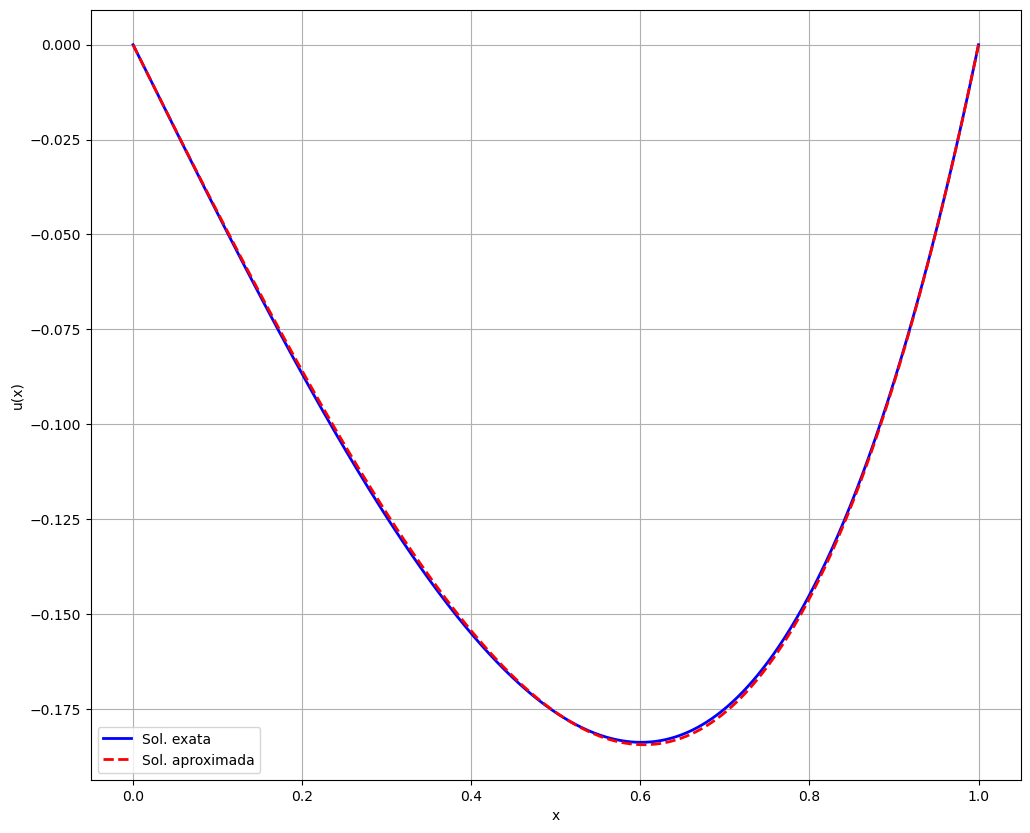

In [36]:

plt.figure(figsize=[12, 10])
plt.plot(a, sol_exata(a), label="Sol. exata", linewidth=2, color='blue')
plt.plot(a, apx1, label="Sol. aproximada", color='red', linewidth=2, linestyle='--')
plt.legend()
plt.ylabel('u(x)')
plt.xlabel('x')
plt.grid()
plt.show()

(d) Plote o gráfico do resíduo.

$L[ũ(x)] = \frac{d^2}{dx^2}(\alpha_1(x-x^2) +\alpha_2(x^2-x^3)+\alpha_3(x^3-x^4)-4(\alpha_1(x-x^2) +\alpha_2(x^2-x^3)+\alpha_3(x^3-x^4)$

$E(x)$ =  $L[ũ(x)] - f(x)$

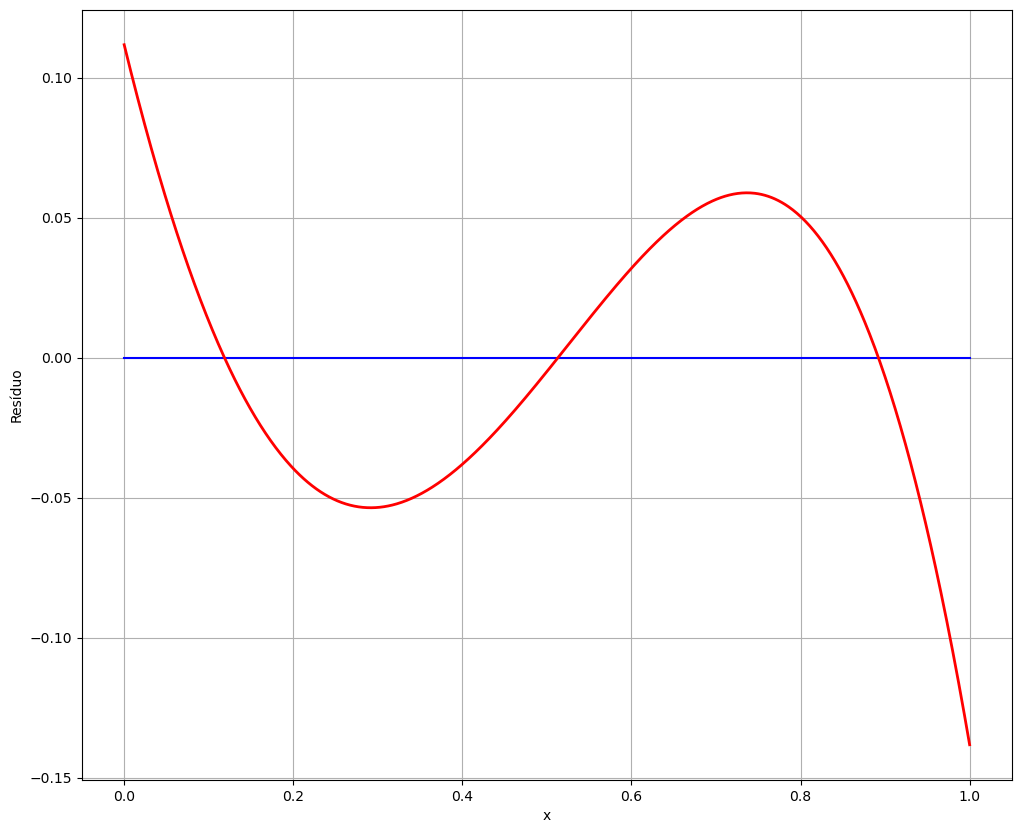

In [37]:
def dphi1():
  return -2
def dphi2(a):
  return 2 - 6*a
def dphi3(a):
  return 6*a - 12*a**2

######################################

r = a1[0]*dphi1() + a1[1]*dphi2(a) + a1[2]*dphi3(a) - 4*apx1 - 4*a
plt.figure(figsize=[12, 10])
plt.plot(a, np.zeros(len(a)), color='blue')
plt.plot(a, r, linewidth=2, color='red')
plt.ylabel('Resíduo')
plt.xlabel('x')
plt.grid()
plt.show()

### 2) Resolva o problema usando o método da Colocação com $N=3$ e os seguintes pontos $\xi_1 = 0.25$, $\xi_2 = 0.5$ e $\xi_3 = 0.75$.

(a) Apresente as funções bases da solução aproximada e as funções de ponderação.

Funções de base

$ϕ_j = x^j(1 - x)$

$\phi_1 = x-x^2$

$\phi_2 = x^2-x^3$

$\phi_3 = x^3-x^4$

$ũ(x) = \alpha_1\phi_1 +\alpha_2\phi_2+\alpha_3\phi_3$

___

Funções de ponderação
$ω_i = d(x-\xi_i)$

$\omega_1 = d(x - \xi_1) = d(x - 0.25)$

$\omega_2 = d(x - \xi_2) = d(x - 0.5)$

$\omega_3 = d(x - \xi_3) = d(x - 0.75)$

(b) Apresente a matriz $\mathbf{A}$ e o vetor $\mathbf{b}$ do sistema linear resultante.

In [38]:
def L1(x):
  return -2 - 4*x + 4*x**2
def L2(x):
  return 2 - 6*x - 4*x**2 + 4*x**3
def L3(x):
  return 6*x - 12*x**2 - 4*x**3 + 4*x**4

######################################

A2 = np.zeros([3,3])
B2 = np.zeros(3)

xi = np.array([0.25, 0.5, 0.75])

for i in range(3):
  B2[i] = 4*xi[i]

  for j in range(3):
    if j == 0:
      A2[i,j] = L1(xi[i])
    elif j == 1:
      A2[i,j] = L2(xi[i])
    else:
      A2[i,j] = L3(xi[i])
    
print("Matriz A")
print(A2)

print("Matriz B")
print(B2)

a2 = np.linalg.solve(A2, B2)
print("Coeficientes alfa")
print(a2)

Matriz A
[[-2.75      0.3125    0.703125]
 [-3.       -1.5      -0.25    ]
 [-2.75     -3.0625   -2.671875]]
Matriz B
[1. 2. 3.]
Coeficientes alfa
[-0.46232439 -0.37190294 -0.22068966]


(c) Plote o gráfico da solução aproximada em comparação ao gráfico da solução exata.

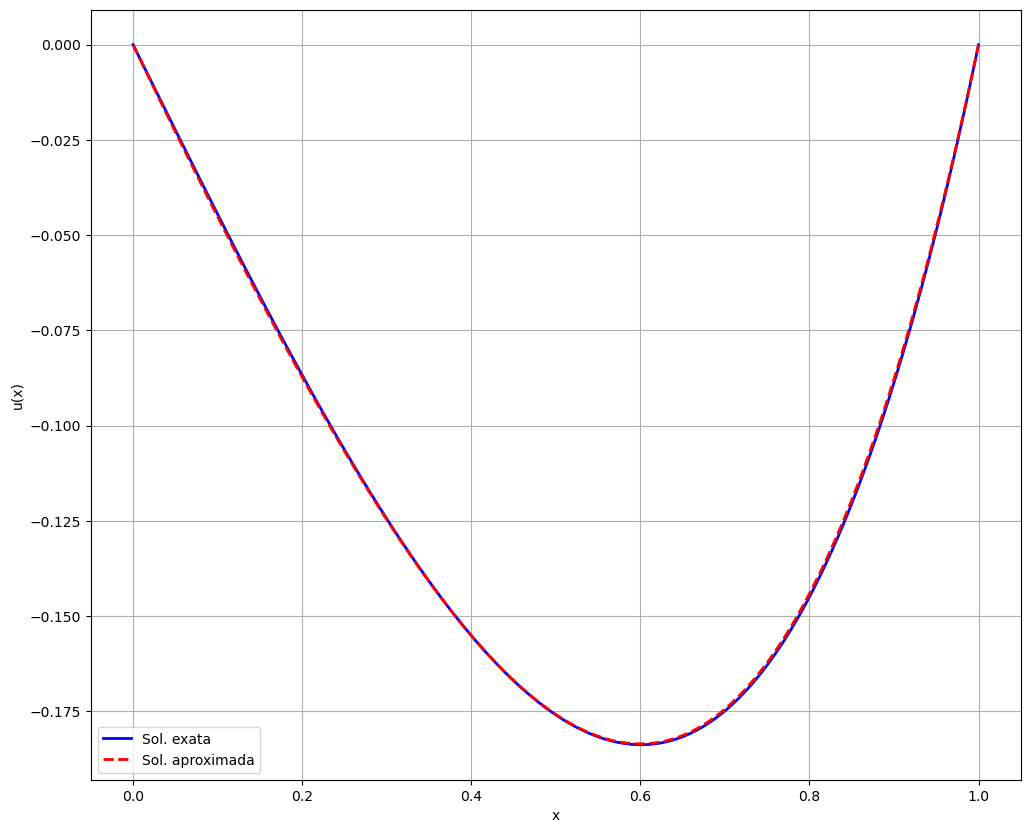

In [39]:
apx2 = a2[0]*phi1(a) + a2[1]*phi2(a) + a2[2]*phi3(a)

plt.figure(figsize=[12, 10])
plt.plot(a, sol_exata(a), label="Sol. exata", linewidth=2, color='blue')
plt.plot(a, apx2, label="Sol. aproximada", color='red', linewidth=2, linestyle='--')
plt.legend()
plt.ylabel('u(x)')
plt.xlabel('x')
plt.grid()
plt.show()

(d) Plote o gráfico do resíduo.

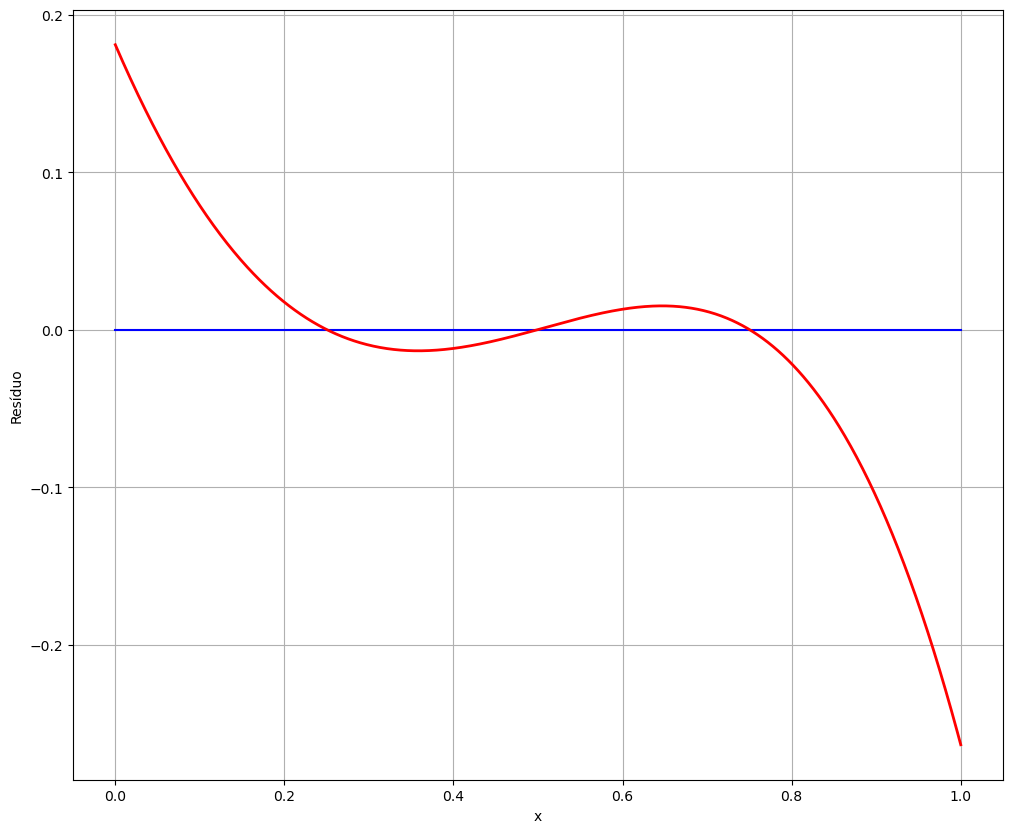

In [40]:
r2 = a2[0]*dphi1() + a2[1]*dphi2(a) + a2[2]*dphi3(a) - 4*apx2 - 4*a

plt.figure(figsize=[12, 10])
plt.plot(a, np.zeros(len(a)), color='blue')
plt.plot(a, r2, linewidth=2, color='red')
plt.ylabel('Resíduo')
plt.xlabel('x')
plt.grid()
plt.show()